In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
# Data is loaded in df. dataDir tell us folder of file.

dataDir = "../Data/Reims/"
df = pd.read_csv(dataDir + "170830-noheader.csv")

C:\Users\Matej\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [109]:
# Data in list are unuseful so we can delete them. ALso data from CH21 to CH40 are unuseful.

list_unused = ["Logic", "Alarm1-10", "Alarm11-20", "Alarm21-30", "Alarm31-40", "AlarmLP", "AlarmOut"]

for element in list_unused:
    df.drop(element, 1, inplace=True)
    
for i in range(21, 41):
    df.drop("CH" + str(i), 1, inplace=True)

# In firs line we have units. We can delete them. 
df.drop(0, 0, inplace=True)

In [110]:
# Converting string to float.
df["ms"] = pd.to_numeric(df["ms"])

for i in range(1, 21):
    df["CH" + str(i)] = pd.to_numeric(df["CH" + str(i)])

In [111]:
# Converting time and apending milliseconds.
df["Date&Time"] = pd.to_datetime(df["Date&Time"], format="%Y-%m-%d %H:%M:%S")
df["Date&Time"] = pd.to_datetime(((df["Date&Time"].astype (np.int64) / 1000000).astype (np.int64) + df["ms"]), unit="ms")


In [112]:
n=1
while n != 21:
    j = str(n)
    df['CH' + j] = df['CH' + j][:60] 
    n += 1

df['ms'] = df['ms'][:60]

In [113]:
df.describe()

,ms,CH1,CH2,CH3,CH4,CH5,CH6,CH7,CH8,CH9,...,CH11,CH12,CH13,CH14,CH15,CH16,CH17,CH18,CH19,CH20
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.00000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,250.000000,22.823333,21.710000,32030.466667,64290.366667,-2.223333,61.712167,-0.073167,0.515000,-0.591667,...,1.79000,6.735000,16.080000,2.491667,23.876500,0.390000,3.935000,0.573333,2.070000,0.066833
std,252.109742,0.074485,0.030253,7496.988533,12527.537997,6.264275,49.201138,0.006507,0.075521,0.272024,...,0.28742,0.079883,0.068396,0.069603,0.006846,0.060226,4.191712,0.044595,0.074333,0.008924
min,0.000000,22.700000,21.700000,-65.000000,-121.000000,-18.300000,-0.190000,-0.090000,0.400000,-1.100000,...,1.30000,6.600000,15.900000,2.400000,23.860000,0.300000,1.600000,0.500000,2.000000,0.050000
25%,0.000000,22.800000,21.700000,27128.750000,62010.500000,0.500000,-0.170000,-0.080000,0.500000,-0.800000,...,1.57500,6.700000,16.000000,2.400000,23.880000,0.400000,1.700000,0.500000,2.000000,0.060000
50%,250.000000,22.800000,21.700000,36542.000000,69081.000000,0.750000,100.180000,-0.070000,0.500000,-0.500000,...,1.70000,6.700000,16.100000,2.500000,23.880000,0.400000,1.700000,0.600000,2.100000,0.065000
75%,500.000000,22.825000,21.700000,36542.000000,69083.000000,1.000000,100.180000,-0.070000,0.600000,-0.400000,...,2.10000,6.800000,16.100000,2.500000,23.880000,0.400000,2.400000,0.600000,2.100000,0.070000
max,500.000000,23.000000,21.800000,36544.000000,69083.000000,1.400000,100.180000,-0.060000,0.700000,-0.200000,...,2.20000,6.900000,16.200000,2.700000,23.880000,0.500000,14.000000,0.600000,2.200000,0.080000


In [114]:
df = df.set_index('Date&Time')

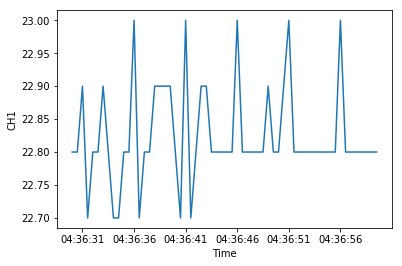

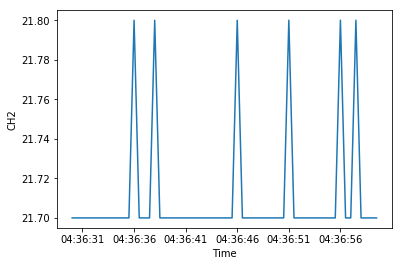

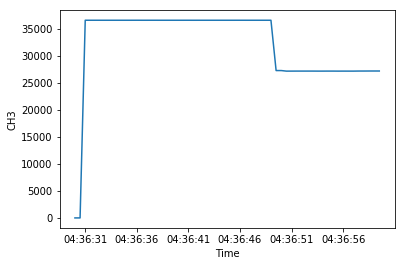

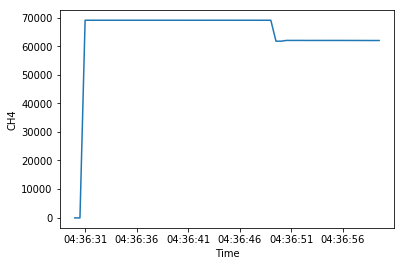

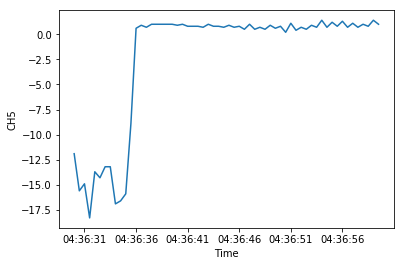

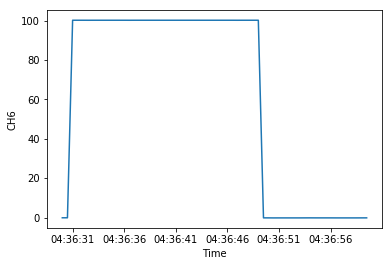

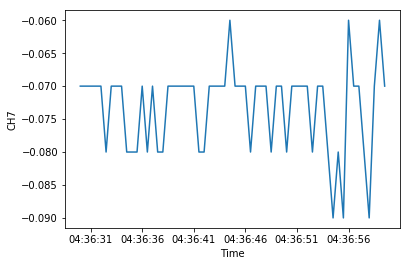

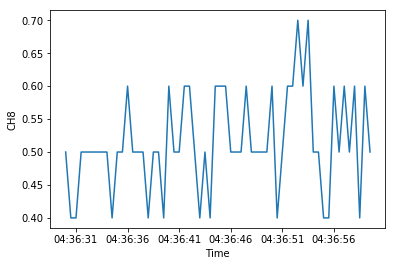

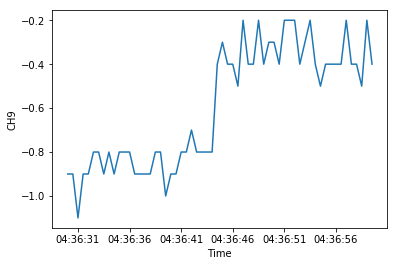

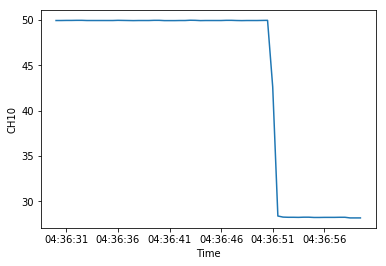

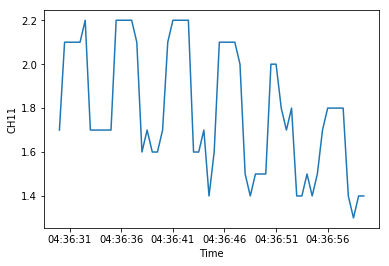

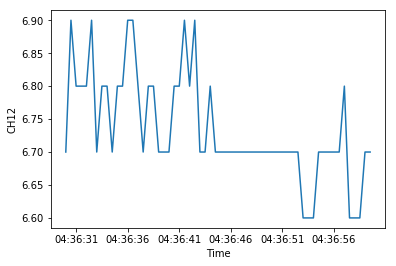

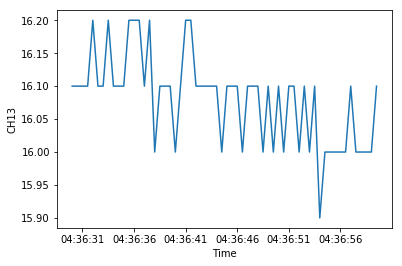

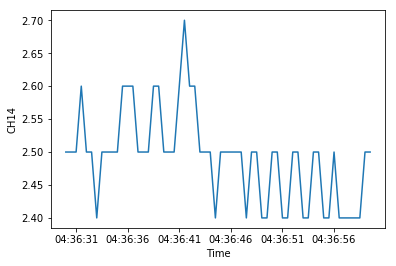

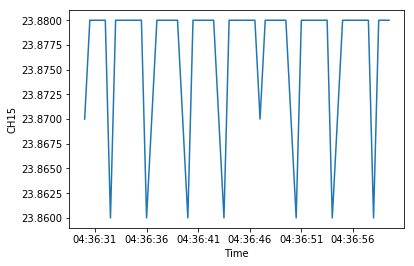

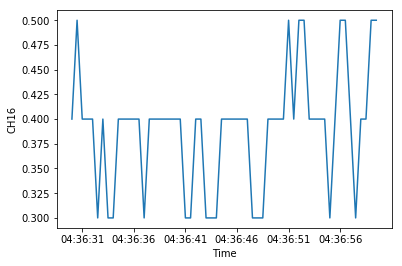

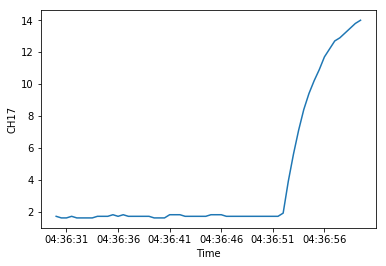

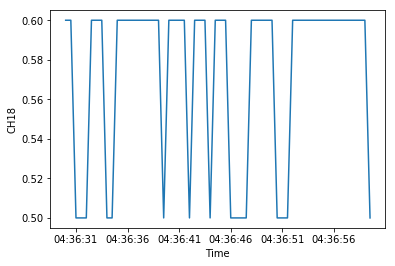

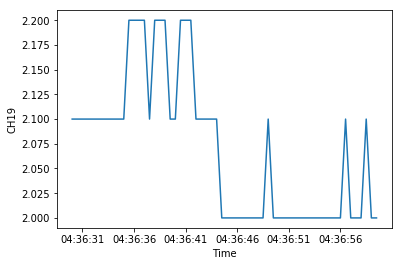

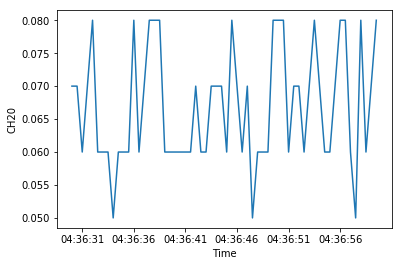

In [128]:
n=1
while n!=21:
    j=str(n)
    plt.figure(n)
    plt.xlabel('Time')
    plt.ylabel('CH' + j)

    plt.plot(df['CH' + j])
    plt.show()
    plt.savefig('CH' + j)
    n += 1

 CH1, "TA_EXT_113” = external temperature in degrees Celsius
     
 
 
  CH2, "TA_INT” = internal tram temperature in degrees Celsius
  
  CH3, "LONGITUDE" = longitude of the tram position. It will be in degrees units after applying the calibration relation.
  
  CH4, "LATITUDE" = latitude of the tram position. It will be in degrees units after applying the calibration relation. 
  
  CH5, "P_Diff" = filter pressure drop in the HVAC system (not interesting for us)
  
  CH6, "VITESSE" = tram speed in km/h
  
  CH7, "I_HVAC_AC1" = DC current 1 of the Heating, Ventilation and Air-Conditioning system in A units
  
  CH8,9 "I_TCU2" = traction current in A units
  
  CH10, "CO2" = CO2 level inside the tram to have a rough estimate of the passenger number. In ppm units once the correction applied.
  
  CH11, "I_RHEO_22" = rheostat current 2 at the roof panel 2 in A units
  
  CH12, "I_RHEO_21" = rheostat current 2 at the roof panel 1 in A units
  
  CH13, "I_RHEO_12” = rheostat current 1 at the roof panel 2 in A units
  
  CH14, "I_RHEO_11" = rheostat current 1 at the roof panel 1 in A units
  
  CH15, "U_CTPP" = indicates whether the power comes from the overhead line (“catenaire” in French) when > 12V or from the third rail on the ground (“alimentation par le sol = APS” in French) when <12V
                                       Notice that indeed the Reims tramway is mostly powered through the overhead line except for the central part of the route (in the city centre) where it is powered for about 2 km through the third rail (see the Map_tramway_reims.png). 
  CH16, "I_CAT" = overhead line current in A units. Notice that during traction I_CAT < 0 (consumed energy) while when I_CAT > 0 the energy is recovered from the braking. 
  
  CH17, "U_CAT" = overhead line voltage in V units
  
  CH18, "I_CVS" = power converter current in A units
  
  CH19, "U_HVAC_AC” = voltage of the Heating, Ventilation and Air-Conditioning system in V units
  
  CH20, "I_HVAC_AC2" = DC current 2 of the Heating, Ventilation and Air-Conditioning system in A units
 

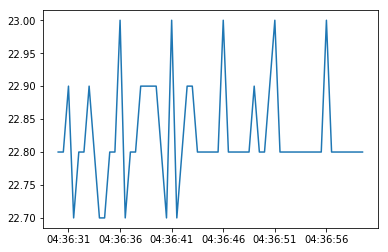

In [127]:
plt.plot(df['CH1'])
plt.show()
plt.savefig('CH1.png')